In [4]:
#Need to Import All required libraries :

import pandas as pd
import numpy as np
import re


import nltk
from nltk import sent_tokenize
from nltk import word_tokenize


import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [5]:
#Reading the Data from the CSV file
Data = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')
Data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


Generate Descriptive statistics include those that summarize the central
tendency, dispersion and shape of a
dataset's distribution, excluding NaN values.

In [6]:
Data.shape
Data.ndim
Data.head()
Data.describe()
Data["tweet"].describe()


count                                                 31962
unique                                                29530
top       #model   i love u take with u all the time in ...
freq                                                    319
Name: tweet, dtype: object

In [7]:
#Checking for null values
Data.isnull().sum()
#Data[pd.notnull(Data["tweet"])]


id       0
label    0
tweet    0
dtype: int64

By using Regular expression and numpy library(faster than python lists) we are removing Twitter Handles( @user ) from 'tweet' column and storing it into another column 'Tweets'

In [8]:
def remove_pattern(text, pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text
Data['Tweets'] = np.vectorize(remove_pattern)(Data['tweet'], "@[\w]*")
Data.head()

,id,label,tweet,Tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


Removing punctuation, numbers, special characters by using regular Expression and also removing unwanted column tweet by using drop()

In [9]:
Data['Tweets'] = Data['Tweets'].str.replace("[^a-zA-Z]", " ")
data = Data.drop("tweet", axis=1)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,id,label,Tweets
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for lyft credit i can t use cause th...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in ...
4,5,0,factsguide society now motivation
...,...,...,...
31957,31958,0,ate isz that youuu ...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,sikh temple vandalised in in calgary wso...


With the help of nltk.word_tokenize () method, we are able to extract the tokens

In [10]:
x = data.loc[:, 'Tweets']
sentence=' '.join(x)
tokens = nltk.word_tokenize(sentence)
tokens

['when',
 'a',
 'father',
 'is',
 'dysfunctional',
 'and',
 'is',
 'so',
 'selfish',
 'he',
 'drags',
 'his',
 'kids',
 'into',
 'his',
 'dysfunction',
 'run',
 'thanks',
 'for',
 'lyft',
 'credit',
 'i',
 'can',
 't',
 'use',
 'cause',
 'they',
 'don',
 't',
 'offer',
 'wheelchair',
 'vans',
 'in',
 'pdx',
 'disapointed',
 'getthanked',
 'bihday',
 'your',
 'majesty',
 'model',
 'i',
 'love',
 'u',
 'take',
 'with',
 'u',
 'all',
 'the',
 'time',
 'in',
 'ur',
 'factsguide',
 'society',
 'now',
 'motivation',
 'huge',
 'fan',
 'fare',
 'and',
 'big',
 'talking',
 'before',
 'they',
 'leave',
 'chaos',
 'and',
 'pay',
 'disputes',
 'when',
 'they',
 'get',
 'there',
 'allshowandnogo',
 'camping',
 'tomorrow',
 'danny',
 'the',
 'next',
 'school',
 'year',
 'is',
 'the',
 'year',
 'for',
 'exams',
 'can',
 't',
 'think',
 'about',
 'that',
 'school',
 'exams',
 'hate',
 'imagine',
 'actorslife',
 'revolutionschool',
 'girl',
 'we',
 'won',
 'love',
 'the',
 'land',
 'allin',
 'cavs',
 '

By using POS tagger assigning parts of speech, grammatical information for each word of the sentence.

In [11]:
from nltk.tag import pos_tag
tokens_tag=pos_tag(tokens)
tokens_tag



[('when', 'WRB'),
 ('a', 'DT'),
 ('father', 'NN'),
 ('is', 'VBZ'),
 ('dysfunctional', 'JJ'),
 ('and', 'CC'),
 ('is', 'VBZ'),
 ('so', 'RB'),
 ('selfish', 'JJ'),
 ('he', 'PRP'),
 ('drags', 'VBZ'),
 ('his', 'PRP$'),
 ('kids', 'NNS'),
 ('into', 'IN'),
 ('his', 'PRP$'),
 ('dysfunction', 'NN'),
 ('run', 'VB'),
 ('thanks', 'NNS'),
 ('for', 'IN'),
 ('lyft', 'JJ'),
 ('credit', 'NN'),
 ('i', 'NN'),
 ('can', 'MD'),
 ('t', 'VB'),
 ('use', 'NN'),
 ('cause', 'NN'),
 ('they', 'PRP'),
 ('don', 'VBP'),
 ('t', 'JJ'),
 ('offer', 'NN'),
 ('wheelchair', 'NN'),
 ('vans', 'NNS'),
 ('in', 'IN'),
 ('pdx', 'NN'),
 ('disapointed', 'VBN'),
 ('getthanked', 'VBD'),
 ('bihday', 'RB'),
 ('your', 'PRP$'),
 ('majesty', 'JJ'),
 ('model', 'NN'),
 ('i', 'NN'),
 ('love', 'VBP'),
 ('u', 'JJ'),
 ('take', 'NN'),
 ('with', 'IN'),
 ('u', 'JJ'),
 ('all', 'PDT'),
 ('the', 'DT'),
 ('time', 'NN'),
 ('in', 'IN'),
 ('ur', 'JJ'),
 ('factsguide', 'JJ'),
 ('society', 'NN'),
 ('now', 'RB'),
 ('motivation', 'VBZ'),
 ('huge', 'JJ'),
 ('fan

By using FreqDist() getting the frequency of words within a Tweets




In [12]:
#Import required libraries :
from nltk.probability import FreqDist

#Find the frequency :
fdist = FreqDist(tokens)

#Print 10 most common words :
fdist.most_common(10)

[('the', 10239),
 ('to', 9868),
 ('i', 7625),
 ('a', 6545),
 ('you', 5952),
 ('and', 4948),
 ('in', 4705),
 ('for', 4512),
 ('of', 4262),
 ('is', 4198)]

By using Fdist.Plot() from the frequency distribution displaying the most frequent words in the Tweets.

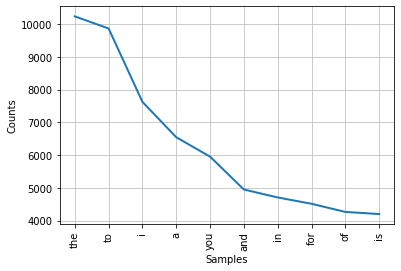

In [13]:
#import matplotlib.pyplot as plt

fdist.plot(10)

By using stopwords.words("english") we are removing stopwords from Tweets.

In [14]:
from nltk.corpus import stopwords

#List of stopwords
stopwords = stopwords.words("english")
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
clean_words = []

for w in tokens:
    if w not in stopwords:
        clean_words.append(w)
        
print(clean_words)
print("\n")
print(len(clean_words))

['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', 'run', 'thanks', 'lyft', 'credit', 'use', 'cause', 'offer', 'wheelchair', 'vans', 'pdx', 'disapointed', 'getthanked', 'bihday', 'majesty', 'model', 'love', 'u', 'take', 'u', 'time', 'ur', 'factsguide', 'society', 'motivation', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo', 'camping', 'tomorrow', 'danny', 'next', 'school', 'year', 'year', 'exams', 'think', 'school', 'exams', 'hate', 'imagine', 'actorslife', 'revolutionschool', 'girl', 'love', 'land', 'allin', 'cavs', 'champions', 'cleveland', 'clevelandcavaliers', 'welcome', 'gr', 'ireland', 'consumer', 'price', 'index', 'mom', 'climbed', 'previous', 'may', 'blog', 'silver', 'gold', 'forex', 'selfish', 'orlando', 'standwithorlando', 'pulseshooting', 'orlandoshooting', 'biggerproblems', 'selfish', 'heabreaking', 'values', 'love', 'get', 'see', 'daddy', 'today', 'days', 'gettingfed', 'cnn', 'calls', 'michigan', 'm

By using Fdist.Plot() from the frequency distribution displaying the clean words after removing stopwords in the Tweets

In [16]:
fdist = FreqDist(clean_words)

fdist.most_common(15)

[('love', 2828),
 ('day', 2393),
 ('amp', 1777),
 ('happy', 1707),
 ('u', 1194),
 ('like', 1180),
 ('life', 1176),
 ('time', 1150),
 ('today', 1095),
 ('new', 1003),
 ('thankful', 952),
 ('positive', 937),
 ('get', 923),
 ('people', 887),
 ('bihday', 874)]

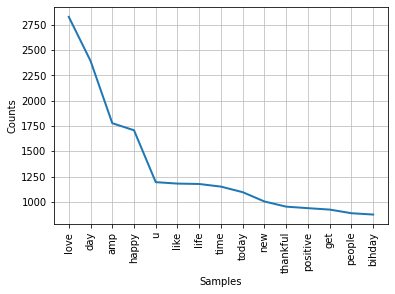

In [17]:
fdist.plot(15)

By using Wordcloud displaying visual representation of Clean words. Words are usually single words, and the importance of each is shown with font size or color

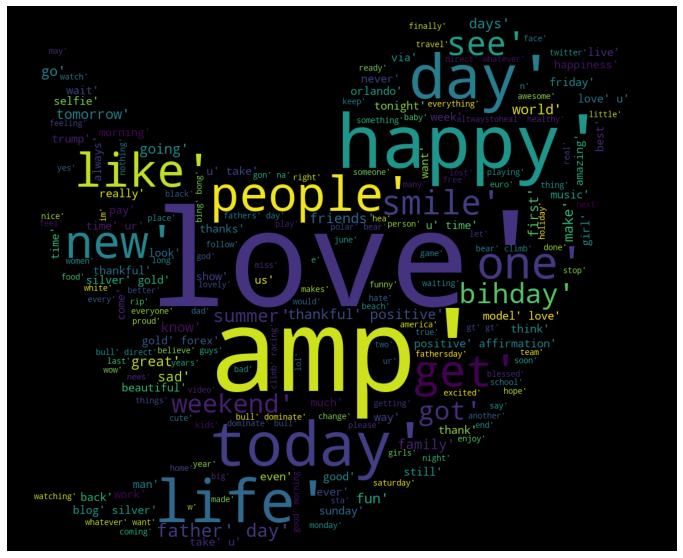

In [18]:
#Library to form wordcloud :
from wordcloud import WordCloud, ImageColorGenerator
import requests
import numpy as np
from PIL import Image

#Library to plot the wordcloud :
import matplotlib.pyplot as plt

# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)



#Generating the wordcloud :
wordcloud = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(str(clean_words))

#Plot the wordcloud :
plt.figure(figsize = (12, 12)) 
plt.imshow(wordcloud) 

#To remove the axis value :
plt.axis("off") 
plt.show()

By using Lambda appending the all the words into a sentence

In [19]:
tokens_Sen=x.apply(lambda sentence: nltk.word_tokenize(sentence))
tokens_Sen


0        [when, a, father, is, dysfunctional, and, is, ...
1        [thanks, for, lyft, credit, i, can, t, use, ca...
2                                  [bihday, your, majesty]
3        [model, i, love, u, take, with, u, all, the, t...
4                   [factsguide, society, now, motivation]
                               ...                        
31957                              [ate, isz, that, youuu]
31958    [to, see, nina, turner, on, the, airwaves, try...
31959    [listening, to, sad, songs, on, a, monday, mor...
31960    [sikh, temple, vandalised, in, in, calgary, ws...
31961                       [thank, you, for, you, follow]
Name: Tweets, Length: 31962, dtype: object

By using Stemming with Python nltk package reducing inflection in words to their root forms.

In [20]:
from nltk.stem import PorterStemmer  
ps = PorterStemmer() 

tokenized_tweet = tokens_Sen.apply(lambda x: [ps.stem(i) for i in x])
tokenized_tweet

0        [when, a, father, is, dysfunct, and, is, so, s...
1        [thank, for, lyft, credit, i, can, t, use, cau...
2                                  [bihday, your, majesti]
3        [model, i, love, u, take, with, u, all, the, t...
4                         [factsguid, societi, now, motiv]
                               ...                        
31957                              [ate, isz, that, youuu]
31958    [to, see, nina, turner, on, the, airwav, tri, ...
31959    [listen, to, sad, song, on, a, monday, morn, o...
31960    [sikh, templ, vandalis, in, in, calgari, wso, ...
31961                       [thank, you, for, you, follow]
Name: Tweets, Length: 31962, dtype: object

By using WordNetLemmatizer() we are getting all the lemmas for Tweets.

In [23]:
from nltk import WordNetLemmatizer

lemma = WordNetLemmatizer()


for w in tokens:
    print(lemma.lemmatize(w ,pos="v"))

Streaming output truncated to the last 5000 lines.
let
the
madness
unravel
bihday
sexy
girl
laura
love
sex
this
weekend
bring
one
of
our
favourite
events
of
the
year
the
fabulous
midsummer
fair
who
else
will
be
there
justarrived
statenisland
statenislandny
statenislandnewyork
newyork
amp
stoke
to
visit
this
congratulations
to
the
brideandgroom
yes
engage
engagement
wed
snail
amp
botnek
stream
snail
amp
botnek
happy
hour
by
snail
from
desktop
or
your
mobile
device
to
the
unite
state
of
america
from
the
rest
of
the
world
i
think
you
ve
prove
you
don
t
have
the
right
to
own
fire
dxracer
office
chair
black
chair
gamedev
success
positive
inspiration
amaze
retweets
nuascannan
just
experience
same
obscene
tsa
conduct
that
mention
recently
scream
at
pax
who
clearly
don
t
speak
english
paxex
have
a
great
even
photo
nature
beetle
traveler
riphumanity
may
allah
keep
thm
under
his
protection
and
bless
thm
ameen
br
r
u
still
here
bother
and
hue
me
michael
never
hus
me
but
u
always
do
be
n
healthy
e

In [24]:
!pip install -U scikit-learn

By using train_test_split function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data

In [25]:
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = Data.iloc[:, :3]
y = Data.iloc[:, 3]
  
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=6)

print("X_train is:",X_train)
print("Y_train is:",y_train)
print("X_test is:",X_test)
print("y_test is:",y_test)


X_train is:           id  label                                              tweet
302      303      0                    what a "huge" crowd for trump. 
23413  23414      0               happy fridayy :))) #friday   #photo 
10036  10037      0  precious memories derive from precious moments...
4482    4483      0  busee_ekizz      #instagood ,#tbt,  , #girl, f...
24803  24804      0  #model   i love u take with u all the time in ...
...      ...    ...                                                ...
4714    4715      0  the daily joust between @user quotes and the r...
10196  10197      0  i pray no one kill themselves but god forbid i...
8419    8420      0  ready for a great day of training with mccormi...
19145  19146      1  @user @user is this what your university stand...
31626  31627      0  good morning! âï¸ð stay positive, pray t...

[30363 rows x 3 columns]
Y_train is: 302                        what a  huge  crowd for trump  
23413                 happy fridayy    

By using Wordcloud displaying visual representation for Positive_words where label==1.

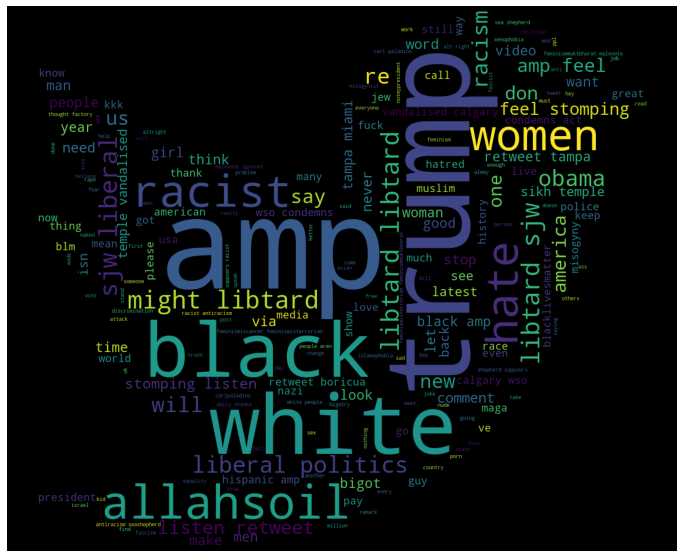

In [26]:
combine = Data.append(Data,ignore_index=True,sort=True)
Positive_words = ' '.join(text for text in Data['Tweets'][combine['label']==1])

# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)



#Generating the wordcloud :
wordcloud = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(Positive_words)

#Plot the wordcloud :
plt.figure(figsize = (12, 12)) 
plt.imshow(wordcloud) 

#To remove the axis value :
plt.axis("off") 
plt.show()



By using Wordcloud displaying visual representation for Negative_words label==0

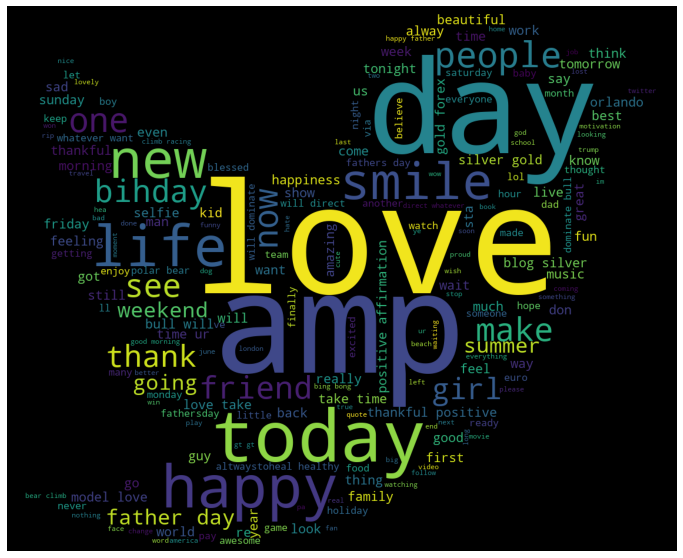

In [27]:
Negative_words = ' '.join(text for text in Data['Tweets'][combine['label']==0])

# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)



#Generating the wordcloud :
wordcloud = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(Negative_words)

#Plot the wordcloud :
plt.figure(figsize = (12, 12)) 
plt.imshow(wordcloud) 

#To remove the axis value :
plt.axis("off") 
plt.show()

By using TfidfVectorizer getting word frequency scores.

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

tfidf_matrix=tfidf.fit_transform(Data['Tweets'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.312831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31960,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


By using sns.countplot() displaying bar graph for labels.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


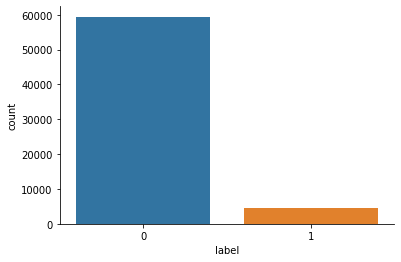

In [34]:
import seaborn as sns
sns.countplot(combine['label'])
#sns.histplot(combine['label'])
sns.despine()